# Qubit Two Tone Frequency Sweep

Run a sweep over the local oscillator frequency and power while reading the change in the response of the resonator. The readout needs to be set at the frequency at which the resonance is observed (for the given flux value used), ideally at the qubit sweet spot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from HelpModule import *
import HelpModule  as help
from E5080B_driver import *
from ZNB26_driver import *
from SGS100A_driver import *
from ERASynthPP_driver import ERASynthPlusPlus
from qcodes import Instrument
from IPython.display import clear_output
from time import sleep


In [8]:
print(pyvisa.ResourceManager().list_resources())
lo = ERASynthPlusPlus('ERASynthPlusPlus', 'ASRL/dev/ttyACM0::INSTR')

('ASRL/dev/ttyS0::INSTR', 'ASRL/dev/ttyS1::INSTR', 'ASRL/dev/ttyS2::INSTR', 'ASRL/dev/ttyS3::INSTR', 'ASRL/dev/ttyS4::INSTR', 'ASRL/dev/ttyS5::INSTR', 'ASRL/dev/ttyS6::INSTR', 'ASRL/dev/ttyS7::INSTR', 'ASRL/dev/ttyS8::INSTR', 'ASRL/dev/ttyS9::INSTR', 'ASRL/dev/ttyS10::INSTR', 'ASRL/dev/ttyS11::INSTR', 'ASRL/dev/ttyS12::INSTR', 'ASRL/dev/ttyS13::INSTR', 'ASRL/dev/ttyS14::INSTR', 'ASRL/dev/ttyS15::INSTR', 'ASRL/dev/ttyS16::INSTR', 'ASRL/dev/ttyS17::INSTR', 'ASRL/dev/ttyS18::INSTR', 'ASRL/dev/ttyS19::INSTR', 'ASRL/dev/ttyS20::INSTR', 'ASRL/dev/ttyS21::INSTR', 'ASRL/dev/ttyS22::INSTR', 'ASRL/dev/ttyS23::INSTR', 'ASRL/dev/ttyS24::INSTR', 'ASRL/dev/ttyS25::INSTR', 'ASRL/dev/ttyS26::INSTR', 'ASRL/dev/ttyS27::INSTR', 'ASRL/dev/ttyS28::INSTR', 'ASRL/dev/ttyS29::INSTR', 'ASRL/dev/ttyS30::INSTR', 'ASRL/dev/ttyS31::INSTR', 'ASRL/dev/ttyACM0::INSTR', 'TCPIP::192.168.0.236::INSTR', 'TCPIP::192.168.250.40::INSTR')
Connected to: ERA Instruments ERASynth++ (serial:0081, firmware:v1.0.18) in 0.37s


In [10]:
lo.close()

In [2]:
Instrument.close_all()

#lo = SGS100A_driver('TCPIP0::192.168.0.36::inst0::INSTR')
#lo = ERASynthPlusPlus('ERASynthPlusPlus', 'ASRL10::INSTR')
lo = ERASynthPlusPlus('ERASynthPlusPlus', 'ASRL/dev/ttyACM0::INSTR')
#vna = E5080B_driver('TCPIP0::192.168.0.235::inst0::INSTR')
vna = ZNB26_driver('TCPIP0::192.168.0.236::inst0::INSTR')
meas_ = 'S21'
twpa_on = False
if twpa_on:
    twpa = SGS100A_driver('TCPIP0::192.168.0.39::inst0::INSTR')
else:
    twpa = SGS100A_driver('dummy')
    
vna.open()
#lo.open()#Removed                              for ERASynh
f_c = 0

Connected to: ERA Instruments ERASynth++ (serial:0081, firmware:v1.0.18) in 1.94s
Could not connect to dummy


/home/user/Documents/_Py_Projects/QChrct_Extra/QCharacterization/.venv/lib/python3.12/site-packages/pyvisa/resources/messagebased.py:647: UserWarning: read string doesn't end with termination characters
  return self.read()


## Two tone frequency sweep
Run a sweep over the local oscillator while reading the change in the response of the resonator. The readout needs to be set at the frequency at which the resonance is observed (for the given flux value used), ideally at the qubit sweet spot.

We find this frequency by measuring a broad spectrum and extracting from it the highest uality peak, normally associated to the principal resonance of the CPW resonator.

In [3]:
from datetime import datetime
params={}

params['test_date'] = datetime.today().strftime('%Y%m%d_%H%M')
params['test_type'] = 'twotone_fpsweep'

# Qubit Parameters
params['qubit_name'] = 'QPU-09_NbTi_2q-single-drive_Q1'
params['qubit_power'] = -40

params['twpa_power'] = 1.42
params['twpa_frequency'] = 6542.23
params['twpa_on'] = False
params['vna_power'] = -60
params['center_freq'] = 5.828918e9 
params['span_freq'] = 10
params['flux_curr'] = 0
params['temp'] = 10
params['comment'] = "# _\n" +\
                    "# Twpa is OFF" +\
                    "# " +\
                    "# " +\
                    "# \n"

# Test Parameters
params['qubitFreqInitial'] = 3000
params['qubitFreqFinal'] = 4000
params['qubitFreqStep'] = 10


if params['twpa_on']:
    twpa.setup(params['twpa_frequency'], params['twpa_power'])

f_c = 0
# if f_c == 0:
#     with twpa:
#         freqs, mag_lp, phase = meas_spectrum(vna, params['center_freq']   ,f_span=params['span_freq'], power=params['vna_power'], npoints=201,sleep_t = 5, meas = meas_)
#         f_c, Qf, FWHMf, mag_dB_minf, figf, fig_dBf = Q(freqs,mag_lp.max()-mag_lp, True) #f_c, Q, FWHM, mag_dB_min, fig, fig_dB

freqs, mag_lp, phase = meas_spectrum(vna, params['center_freq']   ,f_span=params['span_freq'], power=params['vna_power'], npoints=201,sleep_t = 5, meas = meas_)
f_c, Qf, FWHMf, mag_dB_minf, figf, fig_dBf = Q(freqs,mag_lp.max()-mag_lp, True)

print('Center frequency: %2.2f Hz'%f_c)
print('Quality Factor: %2.3f'%Qf)

Center frequency: 5828918000.00 Hz
Quality Factor: 5442.988


/home/user/Documents/_Py_Projects/QChrct_Extra/QCharacterization/HelpModule.py:145: RuntimeWarning:

divide by zero encountered in log10



At this frequency we seep the drive carrier (Local Oscillator) to excite qubit and doing so affect the response seen at the resonator.

## Set test parameters

In [4]:
qubitFreq_array = np.arange(params['qubitFreqInitial'],params['qubitFreqFinal'],params['qubitFreqStep'])

# Check that the f of the resonator is correct 
if f_c == 0:
    with twpa:
        freqs, mag, phase = meas_spectrum(vna, params['center_freq'] ,f_span=params['span_freq'],power=params['vna_power'], npoints=201,sleep_t = 5, data_format='MA',  meas = meas_)
    f_c, Qf, fwhm = Q(freqs,mag.max()-mag, True)

#Initialize the VNA for the 2tone measurement
with twpa:
    freqs, mag, phase = meas_spectrum(vna, 
                       f_c = f_c, 
                       f_span= 10e-6, # VNA in unit MHz
                       power = params['vna_power'],
                       npoints = 3, 
                       sleep_t = 3,  meas = meas_)

#Initialize the Local Oscillator
#lo.open()
lo.set_level(params['qubit_power']) # dBm
#lo.close()

maxv = np.mean(mag)

#Initialize variables for storage
mags = np.ndarray(len(qubitFreq_array))
phases = np.ndarray(len(qubitFreq_array))

mags[:] = maxv
phases[:] = 0

# Run Sweep
delay = 1.5
tt = len(qubitFreq_array)*(delay+0.5)
print('Estimated time: %2.2f min'%(tt/60))
print(maxv)


Estimated time: 3.33 min
0.015477871266333335


In [5]:
import plotly.graph_objects  as go 

#mags[:] = 0
#mags_TT_f_sweep[:]=0
#phases[:] = 0
fig_TT_f_sweep=go.Figure(data=go.Scatter(mode='lines+markers', line=dict(color='Red', width=0.5), x=qubitFreq_array, y=mags)) #zmax=25,  zmin=0, colorscale='Viridis', zsmooth='best', z=mags.T,
fig_TT_f_sweep.update_xaxes(exponentformat = 'power')
fig_TT_f_sweep.add_hline(y=(mag_lp.max()+mag_lp.min())/2, line_width=1, line_dash="dash", line_color='red', opacity=0.7)
fig_TT_f_sweep.add_hline(y=mag_lp.min(), line_width=1, line_dash="dash", line_color='blue', opacity=0.7)
                                               
try:
    for idx,qfreq in enumerate(qubitFreq_array):
        clear_output(wait=True)
        #with lo: #Removed                              for ERASynh
        lo.set_RF(qfreq*1e6) #*1e6
        lo.on() #                                       for ERASynh
        with twpa:
            sleep(0.2)
            vna.reset_average()
            sleep(delay) # VNA Readout integration time
            mag, phase =  vna.get_data( meas = meas_)
        lo.off() #                                      for ERASynh
        a = np.mean(mag) #mag[1]
        if a < 1:
            mags[idx] = a
        else:
            mags[idx] = maxv

        phases[idx] = np.mean(phase) #phase[1]
        fig_TT_f_sweep.data[0].y=mags
        fig_TT_f_sweep.data[0].marker=dict(color=mags, colorscale='bluered', size=5)
        fig_TT_f_sweep.show()
        
        #fig = px.scatter(x=qubitFreq_array, y=mags)
        #fig.show
        #plt.plot(qubitFreq_array,20*np.log10(mags),'x')
        #plt.show()
except KeyboardInterrupt:
    print("Stopped")
    fig_TT_f_sweep.show()

finally:
    results = {}
    results['mags']= mags   
    results['phases']= phases 

    header_str = get_plot_str(params)
    filename = params['test_type'] +"_"+params['qubit_name'] + "_" +params['test_date']
    np.savez("./data/"+filename,
            header = header_str,
            freqs=qubitFreq_array,
            mags=mags,
            phases=phases)
    print('file saved as %s'%filename)

# Extract the qubit frequency
try:
    qubit_f, Qf,_ = Q(qubitFreq_array, mags.max()-mags, True)
except:
    qubit_f = qubitFreq_array[mags.argmax()]
    Qf = 0

print('Qubit frequency: %2.2f MHz, Q: %2.2f'%(qubit_f, Qf))

file saved as twotone_fpsweep_QPU-09_NbTi_2q-single-drive_Q1_20241016_1306
Qubit frequency: 3450.00 MHz, Q: 0.00


/home/user/Documents/_Py_Projects/QChrct_Extra/QCharacterization/HelpModule.py:135: RuntimeWarning:

divide by zero encountered in log10



In [6]:
fig_TT_f_sweep.show()

In [7]:
lo.print_readable_snapshot(update=True)

ERASynthPlusPlus:
	parameter                 value
--------------------------------------------------------------------------------
IDN                        :	{'vendor': 'ERA Instruments', 'model': 'ERASynth...
current                    :	0.23 (V)
debug_messages_en          :	False 
embedded_version           :	v1.0.18 
frequency                  :	3990000000 (Hz)
modulation_am_depth        :	20 (%)
modulation_en              :	False 
modulation_fm_deviation    :	5000 (Hz)
modulation_freq            :	1000 (Hz)
modulation_pulse_period    :	0.002 (s)
modulation_pulse_width     :	0.001 (s)
modulation_signal_waveform :	sine 
modulation_source          :	internal 
modulation_type            :	narrowband_fm 
pll_lmx1_status            :	unlocked 
pll_lmx2_status            :	unlocked 
pll_xtal_status            :	locked 
power                      :	-40 (dBm)
ref_osc_source             :	int 
reference_tcxo_ocxo        :	tcxo 
status                     :	False 
sweep_dwell              

In [8]:
qubit_f, Qf,_ = Q(qubitFreq_array, 0.006-mags , True)
print('Qubit frequency: %2.2f MHz, Q: %2.2f'%(qubit_f, Qf))

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1200.

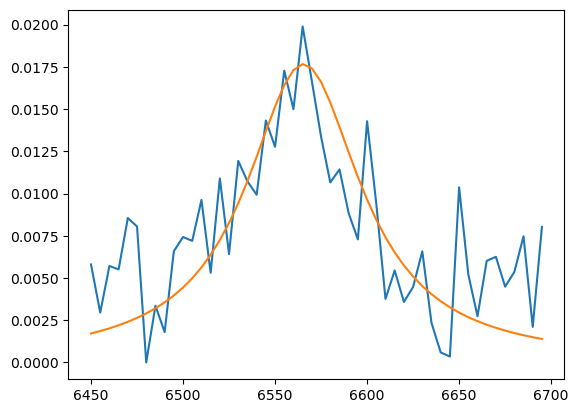  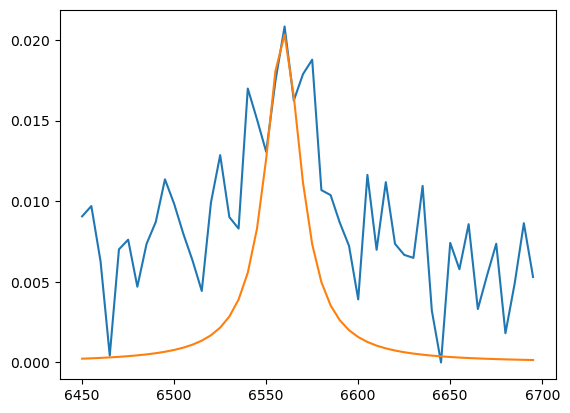